In [1]:
#Load in Statsbomb competition and match data
#This is a library for loading json files.
import json

#Load the competition file
#Got this by searching 'how do I open json in Python'
with open('Statsbomb_data/competitions.json') as f:
    competitions = json.load(f)

In [2]:
#Mens World Cup 2019 has competition ID 43
competition_id=43

#Load the list of matches for this competition
with open('Statsbomb_data/matches/'+str(competition_id)+'/3.json') as f:
    matches2 = json.load(f)

In [3]:
#Now lets find a match we are interested in
home_team_required ="France"
away_team_required ="Croatia"

#Find ID for the match
for match2 in matches2:
    home_team_name=match2['home_team']['home_team_name']
    away_team_name=match2['away_team']['away_team_name']
    if (home_team_name==home_team_required) and (away_team_name==away_team_required):
        match_id_required = match2['match_id']
print(home_team_required + ' vs ' + away_team_required + ' has id:' + str(match_id_required))

France vs Croatia has id:8658


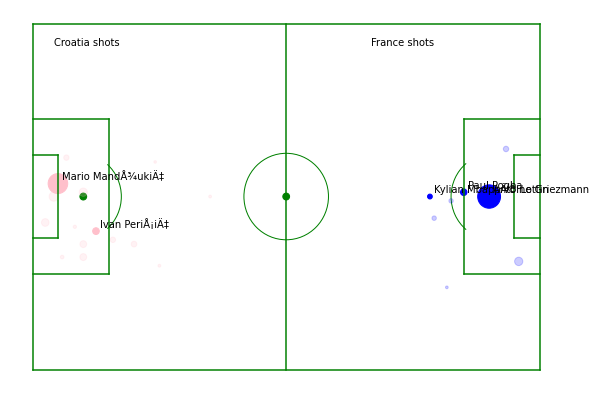

In [4]:
import pitch
import matplotlib.pyplot as plt
import numpy as np

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#ID for Portugal vs Spain Mens World Cup
match_id_required = 8658
home_team_required ="France"
away_team_required ="Croatia"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
 
    
import json
with open('statsbomb_data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

    
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    
#Draw the pitch
from pitch import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','green')

#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    circleSize=np.sqrt(shot['shot_statsbomb_xg'])*3.1

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="blue")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="blue")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="pink") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="pink")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
plt.show()